In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

from datetime import datetime
import matplotlib.dates as mdates
from scipy.ndimage.filters import gaussian_filter1d

#Import relevant NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

#Download relevant data files
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 
nltk.download('punkt')
nltk.download('wordnet')

listingData = pd.read_csv('listings.csv')
calendarData = pd.read_csv('calendar.csv')
reviewData = pd.read_csv('reviews.csv')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JiaEn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JiaEn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\JiaEn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Neighbourhood with most AirBnb 
#### Bar Graph Representation

[Text(0, 0, 'West Queen Anne'),
 Text(0, 0, 'Adams'),
 Text(0, 0, 'West Woodland'),
 Text(0, 0, 'East Queen Anne'),
 Text(0, 0, 'Wallingford'),
 Text(0, 0, 'North Queen Anne'),
 Text(0, 0, 'Green Lake'),
 Text(0, 0, 'Westlake'),
 Text(0, 0, 'Mann'),
 Text(0, 0, 'Madrona'),
 Text(0, 0, 'University District'),
 Text(0, 0, 'Harrison/Denny-Blaine'),
 Text(0, 0, 'Minor'),
 Text(0, 0, 'Leschi'),
 Text(0, 0, 'Atlantic'),
 Text(0, 0, 'Pike-Market'),
 Text(0, 0, 'Eastlake'),
 Text(0, 0, 'South Lake Union'),
 Text(0, 0, 'Lawton Park'),
 Text(0, 0, 'Briarcliff'),
 Text(0, 0, 'Belltown'),
 Text(0, 0, 'International District'),
 Text(0, 0, 'Central Business District'),
 Text(0, 0, 'First Hill'),
 Text(0, 0, 'Yesler Terrace'),
 Text(0, 0, 'Pioneer Square'),
 Text(0, 0, 'Gatewood'),
 Text(0, 0, 'Arbor Heights'),
 Text(0, 0, 'Alki'),
 Text(0, 0, 'North Admiral'),
 Text(0, 0, 'Crown Hill'),
 Text(0, 0, 'Fairmount Park'),
 Text(0, 0, 'Genesee'),
 Text(0, 0, 'Interbay'),
 Text(0, 0, 'Industrial District'

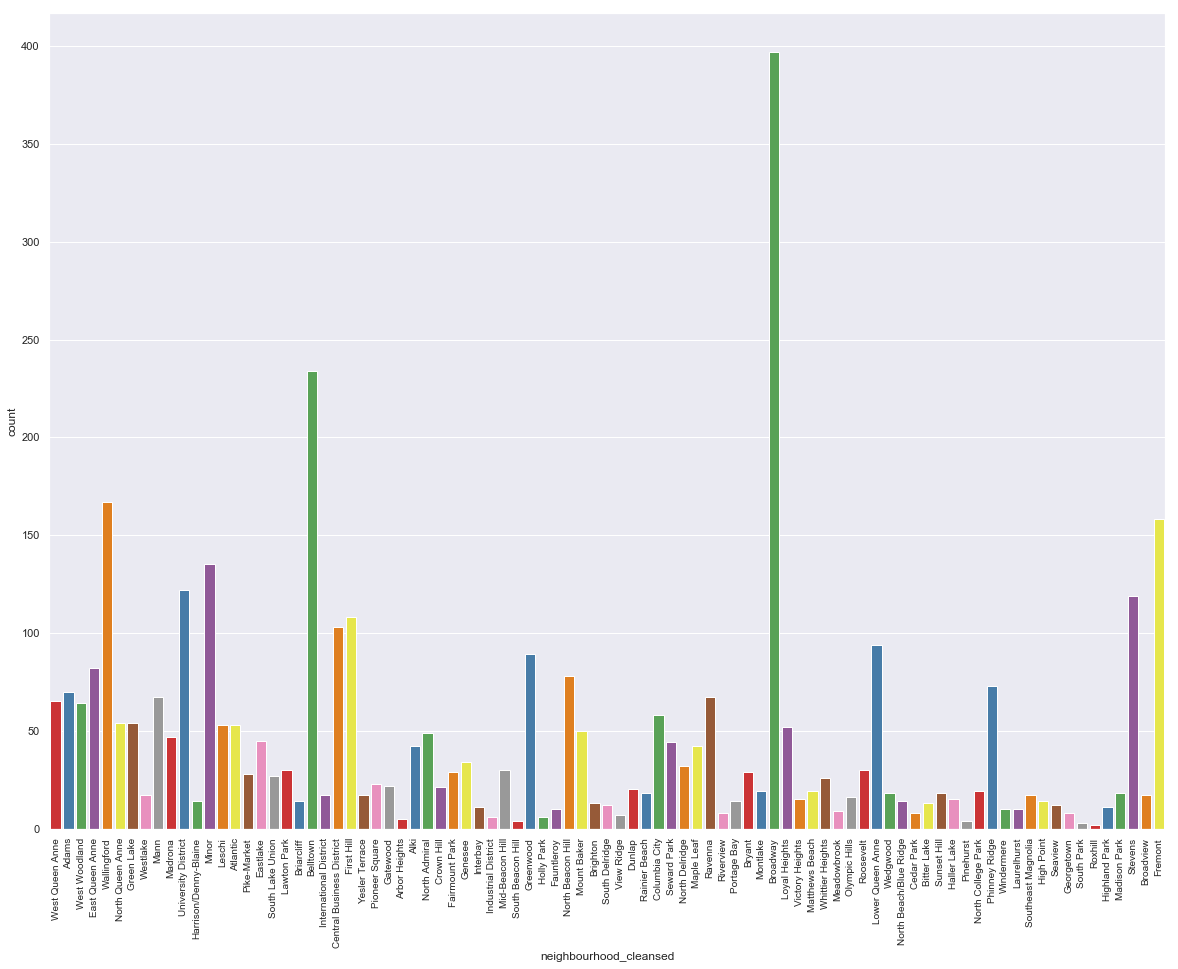

In [2]:
#Author: Lim Jia En
#Identifying neighbourhood with the most Airbnb.
plt.figure(figsize=(20,15))
chart = sb.countplot(
    data=listingData,
    x='neighbourhood_cleansed',
    palette='Set1'
)

chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='medium',

)

### Summary Information
#### Top 3 location with the most number Airbnb 

In [3]:
#Author: Lim Jia En
#The dataset for Top 3 Area with the most Airbnb.
#Helping Users to sort out the mean, most and least expensive of the Airbnb if they are price-oriented.

#Data for Broadway AirBnb

data_1 = pd.read_csv('broadwayprice.csv')
broadway_prices = data_1['price']

# Minimum price of the data
minimum_price = np.amin(broadway_prices)

# Maximum price of the data
maximum_price = np.amax(broadway_prices)

# Mean price of the data
mean_price = np.mean(broadway_prices)

# Standard deviation of prices of the data
std_price = np.std(broadway_prices)

# Show the calculated statistics
print("Statistics for Broadway housing dataset:\n")
print("Minimum price: ${}".format(round(minimum_price, 2))) 
print("Maximum price: ${}".format(round(maximum_price, 2)))
print("Mean price: ${}".format(round(mean_price, 2)))
print("Standard deviation of prices: ${}".format(round(std_price, 2)))

print("----------------------------------------")

#Data for Belltown AirBnb

data_2 = pd.read_csv('belltownprice.csv')
belltown_prices = data_2['price']

# Minimum price of the data
minimum_price = np.amin(belltown_prices)

# Maximum price of the data
maximum_price = np.amax(belltown_prices)

# Mean price of the data
mean_price = np.mean(belltown_prices)

# Standard deviation of prices of the data
std_price = np.std(belltown_prices)

print("Statistics for Belltown housing dataset:\n")
print("Minimum price: ${}".format(round(minimum_price, 2))) 
print("Maximum price: ${}".format(round(maximum_price, 2)))
print("Mean price: ${}".format(round(mean_price, 2)))
print("Standard deviation of prices: ${}".format(round(std_price, 2)))

print("----------------------------------------")

#Data for Wallingford AirBnb

data_3 = pd.read_csv('wallingford.csv')
wallingford_prices = data_3['price']

# Minimum price of the data
minimum_price = np.amin(wallingford_prices)

# Maximum price of the data
maximum_price = np.amax(wallingford_prices)

# Mean price of the data
mean_price = np.mean(wallingford_prices)

# Standard deviation of prices of the data
std_price = np.std(wallingford_prices)

print("Statistics for Wallingford housing dataset:\n")
print("Minimum price: ${}".format(round(minimum_price, 2))) 
print("Maximum price: ${}".format(round(maximum_price, 2)))
print("Mean price: ${}".format(round(mean_price, 2)))
print("Standard deviation of prices: ${}".format(round(std_price, 2)))

Statistics for Broadway housing dataset:

Minimum price: $25.0
Maximum price: $673.0
Mean price: $123.89
Standard deviation of prices: $77.53
----------------------------------------
Statistics for Belltown housing dataset:

Minimum price: $35.0
Maximum price: $999.0
Mean price: $162.89
Standard deviation of prices: $110.29
----------------------------------------
Statistics for Wallingford housing dataset:

Minimum price: $39.0
Maximum price: $680.0
Mean price: $128.43
Standard deviation of prices: $98.76


C:\Users\JiaEn\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Seasonal Trend 
#### Any Trend in Housing & Occupancy?

In [4]:
#Author: Lim Jia En

def timeplot(data, feat, title):
    
    plt.figure(figsize=(18,8))
    
    x = [datetime.strptime(date, '%Y-%m-%d') for date in data.index]
    y = data[feat]
    
    y_smooth = gaussian_filter1d(y, sigma=5)
    
    # set x tick by month
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    
    plt.title(title)
    plt.plot(x, y_smooth, 'c-')
    plt.show()

In [5]:
#Author: Lim Jia En
calendarData['available'].value_counts()

t    934542
f    459028
Name: available, dtype: int64

In [6]:
#Author: Lim Jia En
#convert 'available' into binary (Replacing the T with 1 and F with 2) changing into numeric so system is able to read.
calendarData['available'] = calendarData['available'].map(lambda available: 1 if available == 't' else 0)

In [7]:
#Author: Lim Jia En
#check if the above code works and did what is intended or not
calendarData['available'].value_counts()

1    934542
0    459028
Name: available, dtype: int64

In [8]:
#Author: Lim Jia En
occupancy = calendarData[['date', 'available']].groupby('date').mean()
occupancy['occupancy'] = 1 - occupancy['available']

C:\Users\JiaEn\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


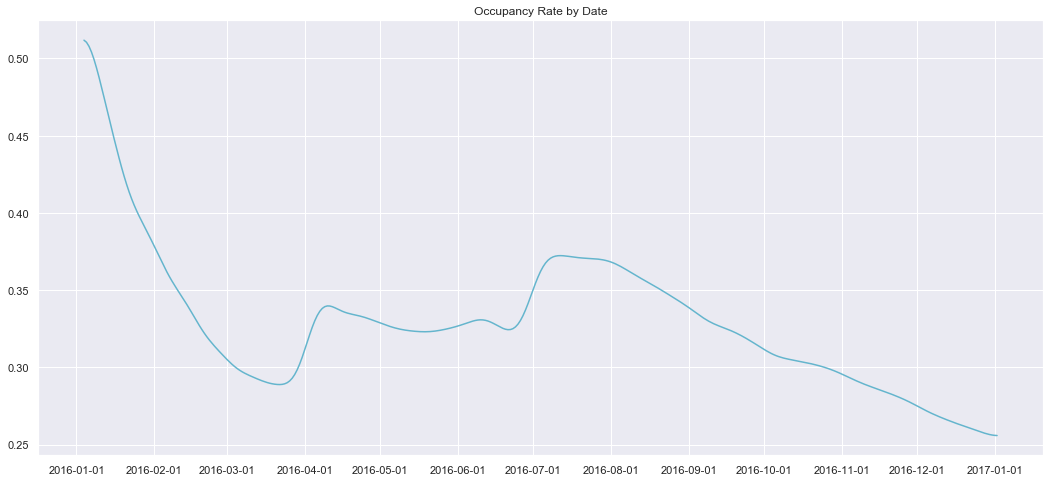

In [9]:
#Author: Lim Jia En
timeplot(occupancy, 'occupancy', 'Occupancy Rate by Date')

With reference from the graph, the month of Jan, 2016 has the highest number of occupancy rate and the lowest being Jan 2017. This might come across as conflicting as people viewing the data might think the trend in Jan, 2016 to be reciprocated on Jan, 2017 as well.

From our research, we had found that during Jan, 2016, there was a NFL (National FootBall League) matchup with Seattle, SeaHawks against the Vikings at a staidum in Seattle . There could be this possibility that hardcore fan from both teams came to Seattle to watch the game and therefore booked an Airbnb. This may be the reason why Jan, 2017 does not have the same occupancy rate as Jan, 2016 due to the fact that maybe during Jan, 2017 there wasn't any event or major games held like the NFL.

Apart from that, we can also see that during the season/month of Spring and Summer, the occupancy rate increases and creating a good business for the Airbnb Host. As an Airbnb Host, the critical period where you can earn the most money would be the season of Spring and Summer as Seattle is very popular during these periods.

As for the Winter period, the occupancy rate for AirBnb as many do not wish to go on a holiday during this period. 

After knowing all this, it would make sense for us to check if the correlation of the occupancy rate affects the rental price. It is for us to see if Airbnb host are actually aware of this phenomenom and uses it to their advantage.

### Trend of the Data
#### Between the Occupancy Rate & Prices of AirBnb

In [10]:
#Author: Lim Jia En
# making 'price' datatype as float
calendarData['price'] = calendarData['price'].map(lambda price: float(price[1:].replace(',', '')), na_action='ignore')

In [11]:
#Author: Lim Jia En
pri_median = calendarData[['date', 'price']].groupby('date').median()

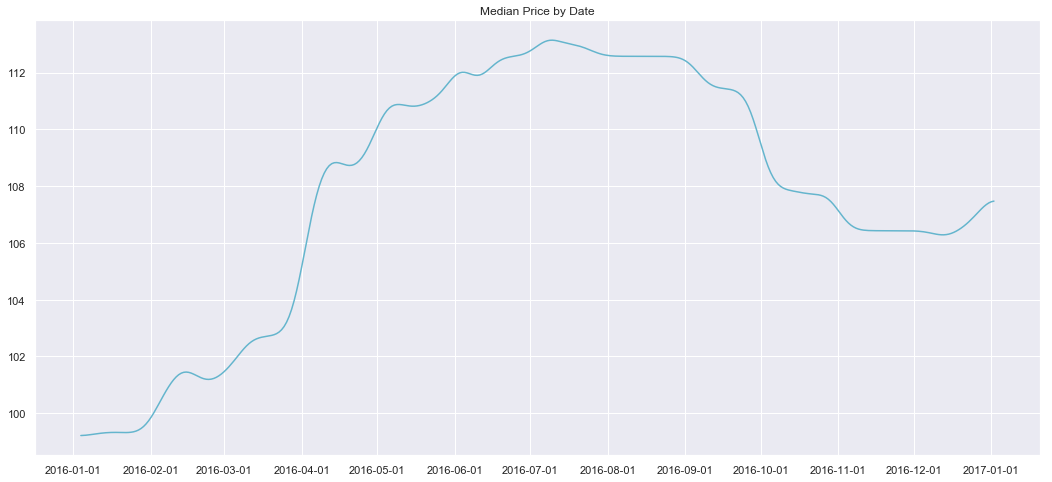

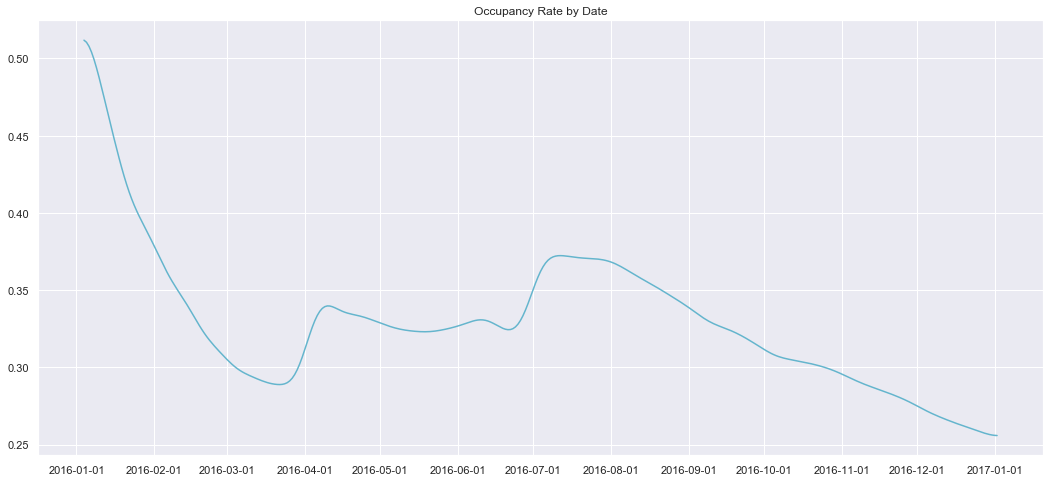

In [12]:
#Author: Lim Jia En
timeplot(pri_median, 'price', 'Median Price by Date')
timeplot(occupancy, 'occupancy', 'Occupancy Rate by Date')

From the graph, we can see that there is a correlation between the price and the occupancy rate.

Comparing the two graph, top graph (Median Price) and bottom graph (Occupancy Rate), we can see that the median price of the rental increases when the occupancy rate is peaking.

This also shows that during a good season such as spring and summer, the Airbnb host uses this opportunity to increase their price as many holiday goers have their holiday at such seasons. And when the season are bad such as winter, the Airbnb will lower the prices of the Airbnb to attract customers to come forward.

### Popular AirBnb and Unpopular Airbnb Comparison
#### Is there a feature/good points we can spot in Popular Airbnb in contrast to Unpopular Airbnb?

In [13]:
#Author: Lim Jia En
occupy = calendarData[['listing_id', 'available']].groupby('listing_id').mean()
occupy['occupancy'] = 1 - occupy['available']
occupy.drop(['available'], axis = 1, inplace=True)
occupy['id'] = occupy.index

In [14]:
#Author: Lim Jia En
occupy.head()

occupancy    id
listing_id                 
3335         0.153425  3335
4291         0.000000  4291
5682         0.153425  5682
6606         0.000000  6606
7369         0.854795  7369

In [15]:
#Author: Lim Jia En
occupy.describe()

occupancy            id
count  3818.000000  3.818000e+03
mean      0.329390  5.550111e+06
std       0.347322  2.962660e+06
min       0.000000  3.335000e+03
25%       0.013699  3.258256e+06
50%       0.156164  6.118244e+06
75%       0.660274  8.035127e+06
max       1.000000  1.034016e+07

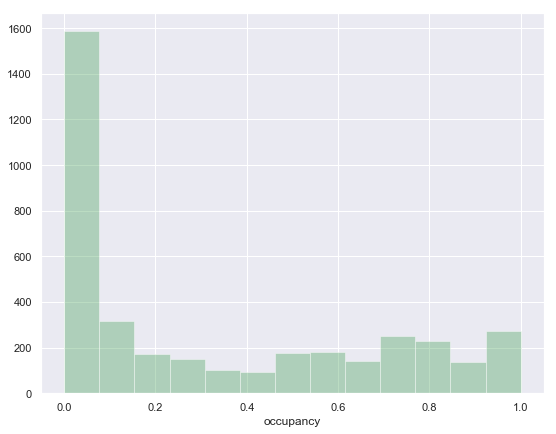

In [16]:
#Author: Lim Jia En

plt.figure(figsize=(9,7))
sb.distplot(occupy['occupancy'], color='g', kde=False)
plt.show()

In [17]:
#Author: Lim Jia En

data = pd.merge(occupy, listingData, how='inner', left_on='id', right_on='id')

In [18]:
#Author: Lim Jia En

threshold = 0.6

def comparisonPlot(feat):

    plt.figure(figsize=(8,6))
        
    # if not float, draw bar plot
    if data[feat].dtype != np.float:
        # build a tempary DataFrame for using seaborn easily
        # includes 3 columns: occupancy, popularity and index
        cnt_popular = data[data['occupancy'] >= threshold][feat].value_counts()
        cnt_unpopular = data[data['occupancy'] < threshold][feat].value_counts()
        fre_popular = pd.DataFrame(cnt_popular / sum(cnt_popular))
        fre_popular['popularity'] = 'Popular'
        fre_popular['index'] = fre_popular.index
        fre_unpopular = pd.DataFrame(cnt_unpopular / sum(cnt_unpopular))
        fre_unpopular['popularity'] = 'Unpopular'
        fre_unpopular['index'] = fre_unpopular.index
        
        plot_data = pd.concat([fre_popular, fre_unpopular], ignore_index=True)
        sb.barplot(x='index', y=feat, hue='popularity', data=plot_data, palette='BrBG_r')
        plt.xticks(rotation='vertical')
        plt.legend(loc=1)
    
    # if float, draw kde line
    else:
        sb.kdeplot(data[feat][data['occupancy'] >= threshold], color='m')
        sb.kdeplot(data[feat][data['occupancy'] < threshold], color='c')
        plt.legend(['Popular', 'Unpopular'], loc=1)
    
    plt.xlabel(feat)
    plt.ylabel('Frequency')
    
    plt.show()

### Popular AirBnb and Unpopular Airbnb Comparison 
#### Host Response Time

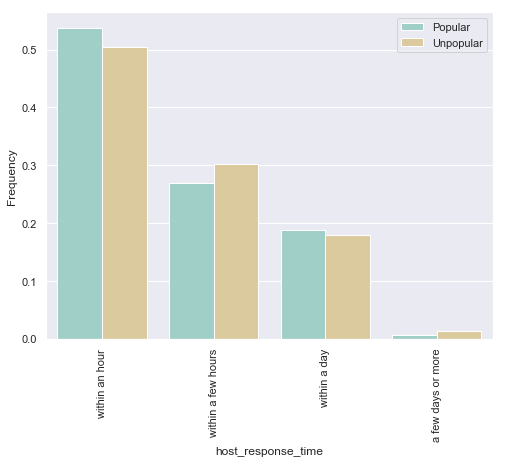

In [19]:
#Author: Lim Jia En
# host response time
comparisonPlot('host_response_time')

From the graph, many people tends to make pre-booking when the Airbnb host replies very promptly.

Airbnb Host replies speed is one of the variable that affects the booking rate of the Airbnb. This data is also very important to Airbnb host as it can allow the host to see a trend and pattern if they want their Airbnb to be rented out and earn some money.

### Popular AirBnb and Unpopular Airbnb Comparison 
#### Neighbourhood

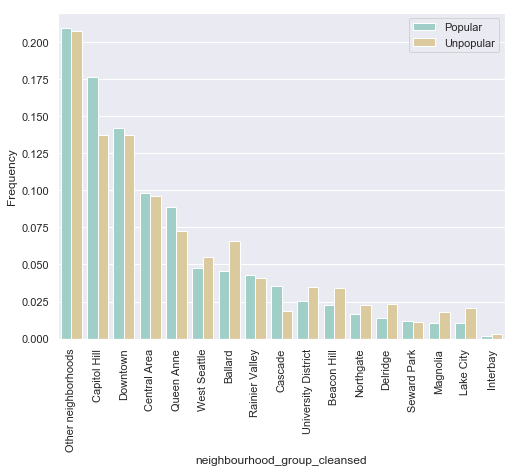

In [20]:
#Author: Lim Jia En
# neighbourhood
comparisonPlot('neighbourhood_group_cleansed')

From what we can from the graph, we can see that the most popular AirBnb spot that people actually booked are from the neighbourhood of Capitol Hill.

There could be a reason why Capitol and Downtown are significantly higher than the rest of the neighbourhood as Capitol Hill, Seattle and Downtown, Seattle are home to many tourist that are visiting with many entertainment outlet as compared to maybe Lake City, Seattle as Lake City is a small town with schools and housing lodge only. There is nothing much as Lake City therefore from the graph the frequency is much lower.

Not to be confused by the Bar Graph representation previously (Comparing which neighbourhood has the most no. of AirBnb), the graph represents the frequency of the booking, in other words, more people tends to stay/want to book.



### Popular AirBnb and Unpopular Airbnb Comparison
#### Instant Bookings

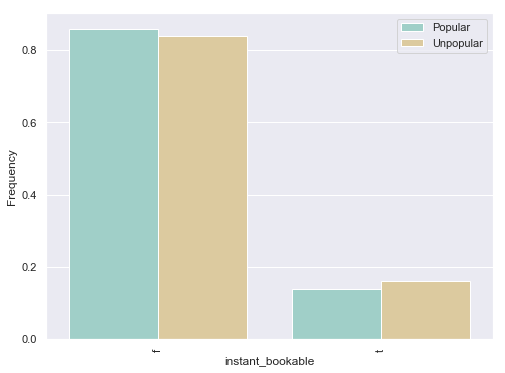

In [21]:
#Author: Lim Jia En
# booking
comparisonPlot('instant_bookable')

From the graph it actually does not matter if the room can be instantly book. Looking at the graph favoring more towards the 'False' Parameter with popular and unpopular very close to each other.

### Popular AirBnb and Unpopular Airbnb Comparison 
#### Property Type

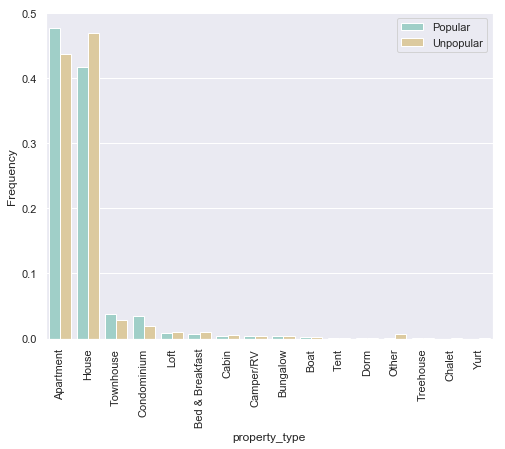

In [22]:
#Author: Lim Jia En
# property type
comparisonPlot('property_type')

Many people prefer to book their Airbnb with an apartment setting or house setting. We can see that settings such as townhouse/condomunium and loft are quite unpopular. 

In addition, comparing the data for house and apartment, we can also infer that the mass majority of people booking airbnb prefer Apartment Type as compared to House Type.

### Popular AirBnb and Unpopular Airbnb Comparison
#### Cancellation Policy

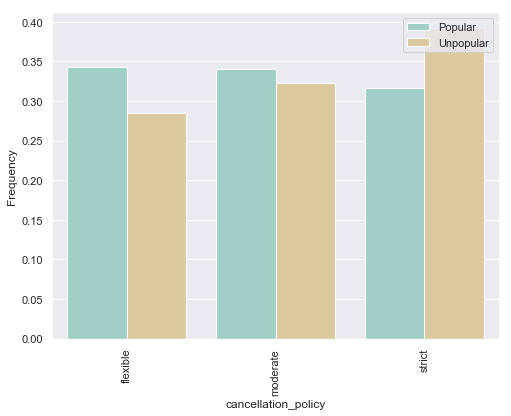

In [23]:
#Author: Lim Jia En
# cancellation policy
comparisonPlot('cancellation_policy')

We can see from the graph that if the AirBnb Host adopt a more flexible cancellation policy, the frequency of the people engaging them are much higher as compared to host adopting a moderate or strict cancellation policy.

With reference from the graph, the more popular option of Airbnb are the one with more flexible cancellation policy.

### Removing Irrelavant Data

#### Cleaning Data Files

In [29]:
#Author: Prashant
#import

listing = pd.read_csv('listings.csv')
calendar = pd.read_csv('calendar.csv')
reviews = pd.read_csv('reviews.csv')

### Clean 'Calendar.csv' File

In [25]:
#Author: Prashant
calendar.head()

listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN

In [26]:
#Author: Prashant

#Drop all NaN rows
calendar=calendar.dropna()

calendar.reset_index(inplace=True) 
calendar=calendar.drop(columns=['index'])

#Drop available column as it no longer yields information
del calendar['available']

In [27]:
#Author: Prashant

for i in range(len(calendar)):
  price=calendar.at[i,'price']
  price=price.replace('$','')
  price=price.replace(',','')
  calendar.at[i,'price']=float(price)

calendar.head()

listing_id        date price
0      241032  2016-01-04    85
1      241032  2016-01-05    85
2      241032  2016-01-13    85
3      241032  2016-01-14    85
4      241032  2016-01-18    85

### Clean 'Reviews.csv' File

In [30]:
#Author: Prashant
#cleaning reviews Data
reviews.head()

listing_id        id        date  reviewer_id reviewer_name  \
0     7202016  38917982  2015-07-19     28943674        Bianca   
1     7202016  39087409  2015-07-20     32440555         Frank   
2     7202016  39820030  2015-07-26     37722850           Ian   
3     7202016  40813543  2015-08-02     33671805        George   
4     7202016  41986501  2015-08-10     34959538          Ming   

                                            comments  
0  Cute and cozy place. Perfect location to every...  
1  Kelly has a great room in a very central locat...  
2  Very spacious apartment, and in a great neighb...  
3  Close to Seattle Center and all it has to offe...  
4  Kelly was a great host and very accommodating ...

In [31]:
#Author: Prashant
reviews.dropna()

listing_id        id        date  reviewer_id        reviewer_name  \
0         7202016  38917982  2015-07-19     28943674               Bianca   
1         7202016  39087409  2015-07-20     32440555                Frank   
2         7202016  39820030  2015-07-26     37722850                  Ian   
3         7202016  40813543  2015-08-02     33671805               George   
4         7202016  41986501  2015-08-10     34959538                 Ming   
5         7202016  43979139  2015-08-23      1154501               Barent   
6         7202016  45265631  2015-09-01     37853266                Kevin   
7         7202016  46749120  2015-09-13     24445447                 Rick   
8         7202016  47783346  2015-09-21       249583                 Todd   
9         7202016  48388999  2015-09-26     38110731              Tatiana   
10        7202016  49441269  2015-10-04     39852826                  Tim   
11        7202016  50490194  2015-10-12       384855                 Tony   
12        7202016  53862449  2015-11-13     21607838                Jason   
13        7202016  54562283  2015-11-21     17052263                  Don   
14        7202016  55212826  2015-11-29      4774006               Vivian   
15        7202016  58268184  2016-01-02     41297839               Travis   
16        3946674  20798623  2014-10-05      9313038             Angeline   
17        3946674  21224862  2014-10-13      8385649               Celine   
18        3946674  22877803  2014-11-16      9403201                 Rémy   
19        3946674  22938377  2014-11-17      2920596                Jason   
20        3946674  23416253  2014-11-30     23579299               Margit   
21        3946674  23463915  2014-12-01     20706964               Ashley   
22        3946674  23709531  2014-12-08     23941301                  Tim   
23        3946674  23961948  2014-12-15      7008965              Gabriel   
24        3946674  24118813  2014-12-20     24025530                 Davi   
25        3946674  24302648  2014-12-25     23834617                  Tim   
26        3946674  25275185  2015-01-11     11109842             Michelle   
27        3946674  26338015  2015-02-09      9997395                 Jack   
28        3946674  27110794  2015-02-25      4920230             Adrienne   
29        3946674  27182900  2015-02-27      3002880                Sasha   
...           ...       ...         ...          ...                  ...   
84819     3424991  44496259  2015-08-26     42076842                   Xu   
84820     3424991  46558529  2015-09-11      1339330              Timothy   
84821     3424991  47823159  2015-09-21      7583246                Jonah   
84822     3424991  48593190  2015-09-27     30353275             Emiliano   
84823     3424991  49062311  2015-09-30     26501715              Bronwyn   
84824     3424991  52847610  2015-11-02     40018387   Jameson & Michelle   
84825     3424991  54116274  2015-11-16     21979218                 Liam   
84826     3424991  54757263  2015-11-23     30703249                Julia   
84827     3424991  55074633  2015-11-27     26327758              Tangwei   
84828     1179538  54492069  2015-11-20     49301240            Francesca   
84829     1179538  55507128  2015-12-01     49230937              Natalie   
84830     3624990  20029700  2014-09-22      6074769             Christie   
84831     3624990  23031040  2014-11-21     19473144                Megan   
84832     3624990  27384730  2015-03-03     23852813              Justine   
84833     3624990  28773963  2015-03-30     13891549  Cyanide & Happniess   
84834     3624990  29827002  2015-04-13      5703826               Janice   
84835     3624990  31793991  2015-05-10     13052628               Jordan   
84836     3624990  32446221  2015-05-18     24660858              Colleen   
84837     3624990  32954604  2015-05-24     22378313                 Ryan   
84838     3624990  35297846  2015-06-17      2457555               Sharon   
848

In [32]:
#Author: Prashant
#Lemmatize and normalize comments, remove stopwords

lem=WordNetLemmatizer()

reviews['cleancomments']='*'
reviews['commentlength']=0

for i in range(len(reviews)):
  try:
    tkn=word_tokenize(reviews.at[i,'comments'])
    l=[]
    l2=[]
    for x in tkn:
      if(x.lower() not in stop_words):
        l.append(lem.lemmatize(x).lower())
    for x in l:
      if((x not in stop_words) and len(x)>1):
        l2.append(x)
    reviews.at[i,'cleancomments']=l2
    reviews.at[i,'commentlength']=len(reviews.at[i,'cleancomments'])
  except TypeError:
    print(i)

11034
15383
15914
16097
27280
29467
30619
31414
35210
37971
40176
41251
47183
61026
61176
64412
71922
76589


In [ ]:
#Author: Prashant
reviews.info()

In [ ]:
#Author: Prashant
#Remove rows that could not be cleaned

reviews=reviews.loc[reviews['cleancomments']!='*']

#Reset indices
reviews.reset_index(inplace=True)
reviews=reviews.drop(columns=['index','comments'])


In [ ]:
#Author: Prashant
#Convert dates to year and month paired lists

for i in range(len(reviews)):
  date=reviews.at[i,'date']
  cleandate=[date[0:4],date[5:7]]
  reviews.at[i,'date']=cleandate

reviews.head()

### Clean 'Listing.csv' Data

In [ ]:
#Author: Prashant
#clean listing data

listings.head()

In [ ]:
#Author: Prashant
#Find how much info each column has

for col in listings.columns:
  print(col)
  print(len(listings[col].unique()))

In [ ]:
#Author: Prashant
#Missing info

listings.info()

In [ ]:
#Author: Prashant
#Drop redundant/unnecessary columns

listings=listings.drop(columns=['zipcode','host_neighbourhood','host_location','cleaning_fee','security_deposit','weekly_price','monthly_price','has_availability','first_review','last_review','square_feet','experiences_offered','listing_url','scrape_id','last_scraped','thumbnail_url','medium_url','picture_url','xl_picture_url','host_url','host_thumbnail_url','host_picture_url','host_total_listings_count','city','state','street','neighbourhood','market','smart_location','country_code','country','calendar_updated','calendar_last_scraped','requires_license','license','jurisdiction_names',])

In [ ]:
#Author: Prashant
#Convert Dates to year and month paired lists

for i in range(len(listings)):
  try:
    date1=listings.at[i,'host_since']
    cleandate1=[date1[0:4],date1[5:7]]
    listings.at[i,'host_since']=cleandate1
  except TypeError:
    print(i)
    listings.at[i,'host_since']='*'

In [ ]:
#Author: Prashant
#Clean numerical features

#Assign missing variables the feature mean

for i in range(len(listings)):
  try:
    val=listings.at[i,'host_response_rate']
    val=val[0:-1]
    listings.at[i,'host_response_rate']=float(val)
  except:
    print(i)
    listings.at[i,'host_response_rate']='*'

mean=0
count=0
for i in range(len(listings)):
  if(listings.at[i,'host_response_rate']!='*'):
    mean+=listings.at[i,'host_response_rate']
    count+=1
mean=mean//count
for i in range(len(listings)):
  if(listings.at[i,'host_response_rate']=='*'):
    listings.at[i,'host_response_rate']=mean


for i in range(len(listings)):
  try:
    val=listings.at[i,'host_acceptance_rate']
    val=val[0:-1]
    listings.at[i,'host_acceptance_rate']=float(val)
  except:
    print(i)
    listings.at[i,'host_acceptance_rate']='*'

mean=0
count=0
for i in range(len(listings)):
  if(listings.at[i,'host_acceptance_rate']!='*'):
    mean+=listings.at[i,'host_acceptance_rate']
    count+=1
mean=mean//count
for i in range(len(listings)):
  if(listings.at[i,'host_acceptance_rate']=='*'):
    listings.at[i,'host_acceptance_rate']=mean


for i in range(len(listings)):
  try:
    val=listings.at[i,'price']
    val=val[1:]
    if(val[1]==','):
      val=val[0]+val[2:]
    listings.at[i,'price']=float(val)
  except TypeError:
    print(i)
    listings.at[i,'price']='*'

mean=0
count=0
for i in range(len(listings)):
  if(listings.at[i,'price']!='*'):
    mean+=listings.at[i,'price']
    count+=1
mean=mean//count
for i in range(len(listings)):
  if(listings.at[i,'price']=='*'):
    listings.at[i,'price']=mean


for i in range(len(listings)):
  try:
    val=listings.at[i,'extra_people']
    val=val[1:]
    listings.at[i,'extra_people']=float(val)
  except TypeError:
    print(i)
    listings.at[i,'extra_people']='*'

mean=0
count=0
for i in range(len(listings)):
  if(listings.at[i,'extra_people']!='*'):
    mean+=listings.at[i,'extra_people']
    count+=1
mean=mean//count
for i in range(len(listings)):
  if(listings.at[i,'extra_people']=='*'):
    listings.at[i,'extra_people']=mean

In [ ]:
#Author: Prashant
#Clean binary features

#Assign missing variables the feature mode

for i in range(len(listings)):
  try:
    val=listings.at[i,'host_is_superhost']
    if(val=='t'):
      val=1
    else:
      val=0
    listings.at[i,'host_is_superhost']=val
  except TypeError:
    print(i)
    listings.at[i,'host_is_superhost']=0

for i in range(len(listings)):
  try:
    val=listings.at[i,'host_has_profile_pic']
    if(val=='t'):
      val=1
    else:
      val=0
    listings.at[i,'host_has_profile_pic']=val
  except TypeError:
    print(i)
    listings.at[i,'host_has_profile_pic']=0

for i in range(len(listings)):
  try:
    val=listings.at[i,'host_identity_verified']
    if(val=='t'):
      val=1
    else:
      val=0
    listings.at[i,'host_identity_verified']=val
  except TypeError:
    print(i)
    listings.at[i,'host_identity_verified']=0

for i in range(len(listings)):
  try:
    val=listings.at[i,'is_location_exact']
    if(val=='t'):
      val=1
    else:
      val=0
    listings.at[i,'is_location_exact']=val
  except TypeError:
    print(i)
    listings.at[i,'is_location_exact']=0

for i in range(len(listings)):
  try:
    val=listings.at[i,'instant_bookable']
    if(val=='t'):
      val=1
    else:
      val=0
    listings.at[i,'instant_bookable']=val
  except TypeError:
    print(i)
    listings.at[i,'instant_bookable']=0

for i in range(len(listings)):
  try:
    val=listings.at[i,'require_guest_profile_picture']
    if(val=='t'):
      val=1
    else:
      val=0
    listings.at[i,'require_guest_profile_picture']=val
  except TypeError:
    print(i)
    listings.at[i,'require_guest_profile_picture']=0

for i in range(len(listings)):
  try:
    val=listings.at[i,'require_guest_phone_verification']
    if(val=='t'):
      val=1
    else:
      val=0
    listings.at[i,'require_guest_phone_verification']=val
  except TypeError:
    print(i)
    listings.at[i,'require_guest_phone_verification']=0

In [ ]:
#Author: Prashant
#Clean and rank ordinal features

#Assign missing variables the feature mode

print("host_response_time")
print(listings['host_response_time'].unique())
print()

print("cancellation_policy")
print(listings['cancellation_policy'].unique())
print()

for i in range(len(listings)):
  try:
    val=listings.at[i,'host_response_time']
    if(val=='within an hour'):
      val=0
    elif(val=='within a few hours'):
      val=1
    elif(val=='within a day'):
      val=2
    elif(val=='a few days or more'):
      val=3
    else:
      val=3
    listings.at[i,'host_response_time']=val
  except TypeError:
    print(i)
    listings.at[i,'host_response_time']=3

for i in range(len(listings)):
  try:
    val=listings.at[i,'cancellation_policy']
    if(val=='flexible'):
      val=0
    elif(val=='moderate'):
      val=1
    elif(val=='strict'):
      val=2
    else:
      val=1
    listings.at[i,'cancellation_policy']=val
  except TypeError:
    print(i)
    listings.at[i,'cancellation_policy']=1

In [ ]:
#Author: Prashant
#Clean numerical features with missing values by taking the mean of the feature

for col in listings.columns:
  if(col=='latitude' or col=='longitude'):
    continue
  if(listings[col].dtype==np.float64):
    listings[col].fillna(listings[col].describe()[1],inplace=True)

In [ ]:
#Author: Prashant
#Clean list features

for i in range(len(listings)):
  val=listings.at[i,'host_verifications']
  num=0
  for x in val:
    if(x=='\''):
      num+=1
  num=num/2
  listings.at[i,'host_verifications']=num

for i in range(len(listings)):
  val=listings.at[i,'amenities']
  num=0
  for x in val:
    if(x==','):
      num+=1
  listings.at[i,'amenities']=num

In [ ]:
#Author: Prashant
#Add missing value by inspection

listings.at[2184,'property_type']='Apartment'

In [ ]:
#Author: Prashant
listings.head()

In [ ]:
#Author: Prashant
#Lemmatize and normalize text, remove stopwords

listings['cleansummary']='*'

for i in range(len(listings)):
  try:
    tkn=word_tokenize(listings.at[i,'summary'])
    l=[]
    l2=[]
    for x in tkn:
      if(x.lower() not in stop_words):
        l.append(lem.lemmatize(x).lower())
    for x in l:
      if((x not in stop_words) and len(x)>1):
        l2.append(x)
    listings.at[i,'cleansummary']=l2
  except TypeError:
    listings.at[i,'cleansummary']=[]


listings['cleandescription']='*'

for i in range(len(listings)):
  try:
    tkn=word_tokenize(listings.at[i,'description'])
    l=[]
    l2=[]
    for x in tkn:
      if(x.lower() not in stop_words):
        l.append(lem.lemmatize(x).lower())
    for x in l:
      if((x not in stop_words) and len(x)>1):
        l2.append(x)
    listings.at[i,'cleandescription']=l2
  except TypeError:
    listings.at[i,'cleandescription']=[]


listings['cleanspace']='*'

for i in range(len(listings)):
  try:
    tkn=word_tokenize(listings.at[i,'space'])
    l=[]
    l2=[]
    for x in tkn:
      if(x.lower() not in stop_words):
        l.append(lem.lemmatize(x).lower())
    for x in l:
      if((x not in stop_words) and len(x)>1):
        l2.append(x)
    listings.at[i,'cleanspace']=l2
  except TypeError:
    listings.at[i,'cleanspace']=[]


listings['cleanneighborhood_overview']='*'

for i in range(len(listings)):
  try:
    tkn=word_tokenize(listings.at[i,'neighborhood_overview'])
    l=[]
    l2=[]
    for x in tkn:
      if(x.lower() not in stop_words):
        l.append(lem.lemmatize(x).lower())
    for x in l:
      if((x not in stop_words) and len(x)>1):
        l2.append(x)
    listings.at[i,'cleanneighborhood_overview']=l2
  except TypeError:
    listings.at[i,'cleanneighborhood_overview']=[]


listings['cleannotes']='*'

for i in range(len(listings)):
  try:
    tkn=word_tokenize(listings.at[i,'notes'])
    l=[]
    l2=[]
    for x in tkn:
      if(x.lower() not in stop_words):
        l.append(lem.lemmatize(x).lower())
    for x in l:
      if((x not in stop_words) and len(x)>1):
        l2.append(x)
    listings.at[i,'cleannotes']=l2
  except TypeError:
    listings.at[i,'cleannotes']=[]


listings['cleantransit']='*'

for i in range(len(listings)):
  try:
    tkn=word_tokenize(listings.at[i,'transit'])
    l=[]
    l2=[]
    for x in tkn:
      if(x.lower() not in stop_words):
        l.append(lem.lemmatize(x).lower())
    for x in l:
      if((x not in stop_words) and len(x)>1):
        l2.append(x)
    listings.at[i,'cleantransit']=l2
  except TypeError:
    listings.at[i,'cleantransit']=[]


listings['cleanhost_about']='*'

for i in range(len(listings)):
  try:
    tkn=word_tokenize(listings.at[i,'host_about'])
    l=[]
    l2=[]
    for x in tkn:
      if(x.lower() not in stop_words):
        l.append(lem.lemmatize(x).lower())
    for x in l:
      if((x not in stop_words) and len(x)>1):
        l2.append(x)
    listings.at[i,'cleanhost_about']=l2
  except TypeError:
    listings.at[i,'cleanhost_about']=[]

listings=listings.drop(columns=['summary','space','description','neighborhood_overview','transit','notes','host_about'])

listings.head()

### Do the reviews a 'Super Host' receive vary from a 'Regular Host'?
#### Can we predict if a host is a superhost based solely on reviews?

In [ ]:
#Author: Prashant
#Find the superhost status of each row of the reviews table

listings['listing_id']=listings['id']

reviews=reviews.join(listings[['listing_id','host_is_superhost']].set_index('listing_id'),on='listing_id')

In [ ]:
#Author: Prashant
#Drop reviewer_name as it is redundant with reviewer_id existing

reviews.drop(columns=['reviewer_name'],inplace=True)

reviews.head()

### Univariate Analysis
#### Comment Length

In [ ]:
#Author: Prashant
print(reviews['commentlength'].describe())
print()

f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(reviews['commentlength'])

In [ ]:
#Author: Prashant
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.violinplot(reviews['commentlength'])

### Univariate Analysis
#### SuperHost

In [ ]:
#Author: Prashant
print(reviews['host_is_superhost'].value_counts())
print()

f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.countplot(reviews['host_is_superhost'])

### Univariate Analysis 
#### Listing_Id Frequency in Reviews

In [ ]:
#Author: Prashant
reviews['listing_id'].value_counts()

In [ ]:
#Author: Prashant
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(reviews['listing_id'].value_counts())

In [ ]:
#Author: Prashant
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.violinplot(reviews['listing_id'].value_counts())

### Bivariate analysis
#### Super Host vs. Comment Length

In [ ]:
#Author: Prashant
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(data=reviews, x='commentlength', y='host_is_superhost', orient='h')

In [ ]:
#Author: Prashant
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.violinplot(data=reviews, x='commentlength', y='host_is_superhost', orient='h')

There is very little difference in the distributions so far, so the analysis will be carried further...

### Bivariate analysis
#### Super Host vs. Listing_Id Frequency

In [ ]:
#Author: Prashant
#Note that column listing_id is actually the frequency count of the id

freq=reviews['listing_id'].value_counts().to_frame()
freq.reset_index(inplace=True) 


freq=freq.join(listings[['listing_id','host_is_superhost']].set_index('listing_id'), on='index')

In [ ]:
#Author: Prashant
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(data=freq, x='listing_id', y='host_is_superhost', orient='h')

In [ ]:
#Author: Prashant
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.violinplot(data=freq, x='listing_id', y='host_is_superhost', orient='h')

As there is a significant difference in the distributions, it is likely that superhosts get longer reviews than regular hosts, making this an important variable in predicting whether or not a host is a superhost.

# HAVENT PUT IN 'Textual analysis with adapted TFIDF'

In [ ]:
#Author: Prashant
f, axes = plt.subplots(1, 1, figsize=(18, 18))
sb.swarmplot(data=freq, x='listing_id', y='host_is_superhost', orient='h')